# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [12]:
#1
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)

In [13]:
reg = sm.OLS(y,X).fit()
reg.summary() # ajustando o modelo de regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.64e-20
Time:                        15:33:36   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#2 as variáveis sex, smoker e time não são significantes, visto o P>|t| muito alto. Removemos então:
y, X = patsy.dmatrices('tip ~ net_bill', data=tips)
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        15:34:23   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

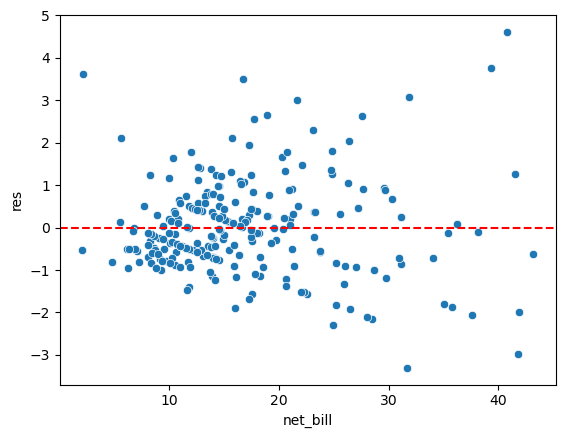

In [15]:
#3
tips['res'] = reg.resid
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           4.40e-20
Time:                        15:38:55   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

Text(0.5, 1.0, 'Residuos - log no x')

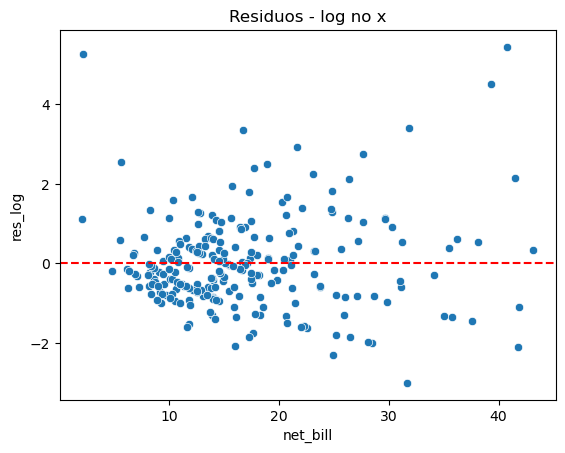

In [19]:
#4 net_bill em log

y, X = patsy.dmatrices('tip ~ np.log(net_bill)', data=tips)
reg = sm.OLS(y,X).fit()
print(reg.summary())

tips['res_log'] = reg.resid
sns.scatterplot(x='net_bill', y='res_log', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos - log no x')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.47e-20
Time:                        16:14:08   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

Text(0.5, 1.0, 'Residuos - polinômio no x')

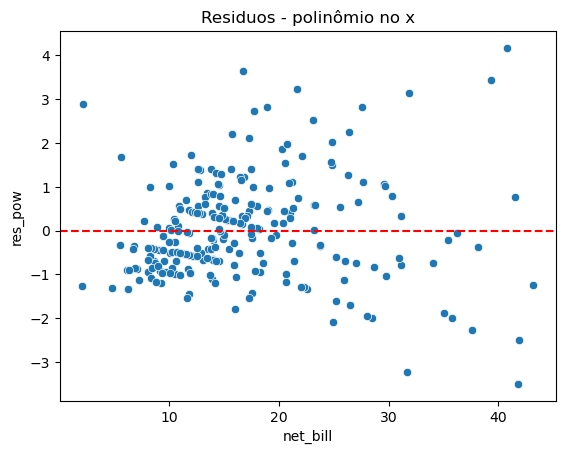

In [29]:
#4 net_bill em polinômio

y, X = patsy.dmatrices('tip ~ np.power(net_bill,2)', data=tips)
reg = sm.OLS(y,X).fit()
print(reg.summary())

tips['res_pow'] = reg.resid
sns.scatterplot(x='net_bill', y='res_pow', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos - polinômio no x')

In [30]:
# calculando  R² 
tips['pred_tip'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_tip', 'tip']].corr().iloc[0,1]**2
print(r2)

0.16688288579616042


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [21]:
#1
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips)
reg = sm.OLS(y,X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.21e-18
Time:                        15:44:09   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [22]:
#2 as variáveis sex, smoker e time não são significantes, visto o P>|t| muito alto. Removemos:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data=tips)
reg = sm.OLS(y,X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.60e-21
Time:                        15:45:57   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Residuos - log no y')

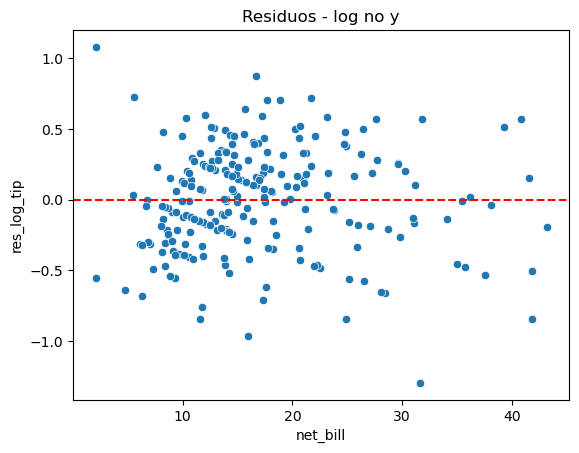

In [23]:
#3
tips['res_log_tip'] = reg.resid
sns.scatterplot(x='net_bill', y='res_log_tip', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos - log no y')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.62e-22
Time:                        15:53:12   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

Text(0.5, 1.0, 'Residuos - log em x e y')

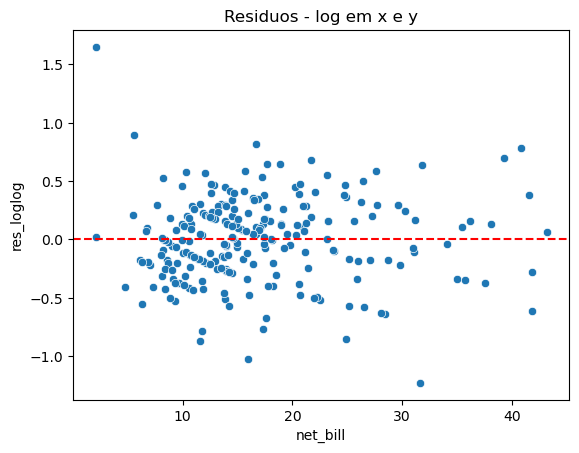

In [24]:
#4 net_bill em log

y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', data=tips)
reg = sm.OLS(y,X).fit()
print(reg.summary())

tips['res_loglog'] = reg.resid
sns.scatterplot(x='net_bill', y='res_loglog', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos - log em x e y')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           7.70e-17
Time:                        16:13:31   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

Text(0.5, 1.0, 'Residuos - log em y, polinomio em x')

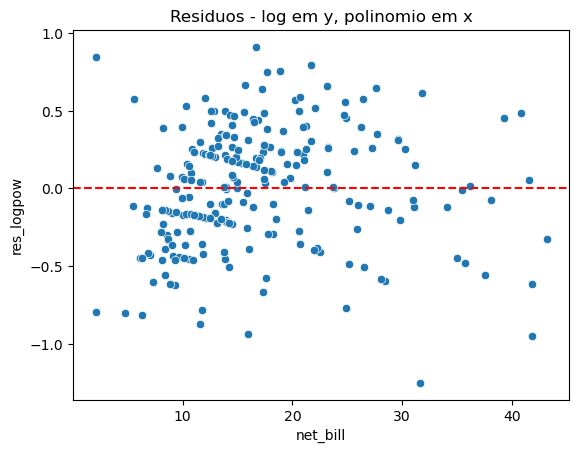

In [27]:
#4 net_bill em polinômio

y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill,2)', data=tips)
reg = sm.OLS(y,X).fit()
print(reg.summary())

tips['res_logpow'] = reg.resid
sns.scatterplot(x='net_bill', y='res_logpow', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos - log em y, polinomio em x')

In [ ]:
# Do modelo final deste item, calcule o  𝑅2 
# na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [26]:
tips['pred_tip'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_tip', 'tip']].corr().iloc[0,1]**2
print(r2)

0.26748820870232776


In [ ]:
# comparado com o modelo do item 1, o modelo do item 2 tem melhor coeficiente de determinação (maior). 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [35]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao = previsao.dropna()

In [38]:
previsao.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'res'],
      dtype='object')

In [40]:
#Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. 
#Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

y2, X2 = patsy.dmatrices('renda ~ tempo_emprego', data=previsao)
reg2 = sm.OLS(y2,X2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:32:46   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

Text(0.5, 1.0, 'Residuos')

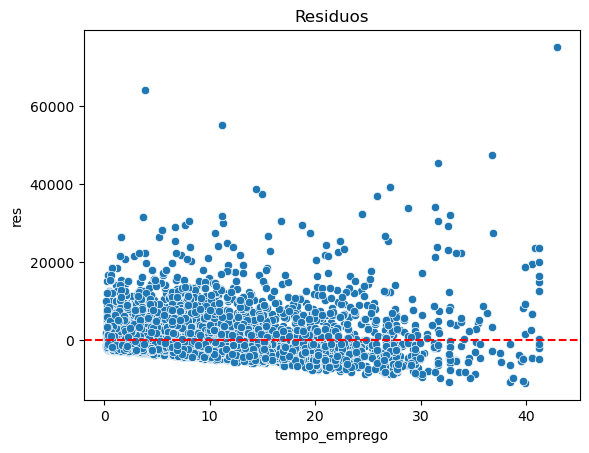

In [37]:
#Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

previsao['res'] = reg2.resid
sns.scatterplot(x='tempo_emprego', y='res', data=previsao)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos')

#como os dados não estão bem distribuidos no eixo y, eu faria uma transformação em y

In [53]:
#Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
#Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

y2, X2 = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego', data=previsao)
reg2 = sm.OLS(y2,X2).fit()
print(reg2.summary())

# aplicada a transformação de log em y, e foram mantidas apenas as variáveis com P>|t| = 0 

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:51:06   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

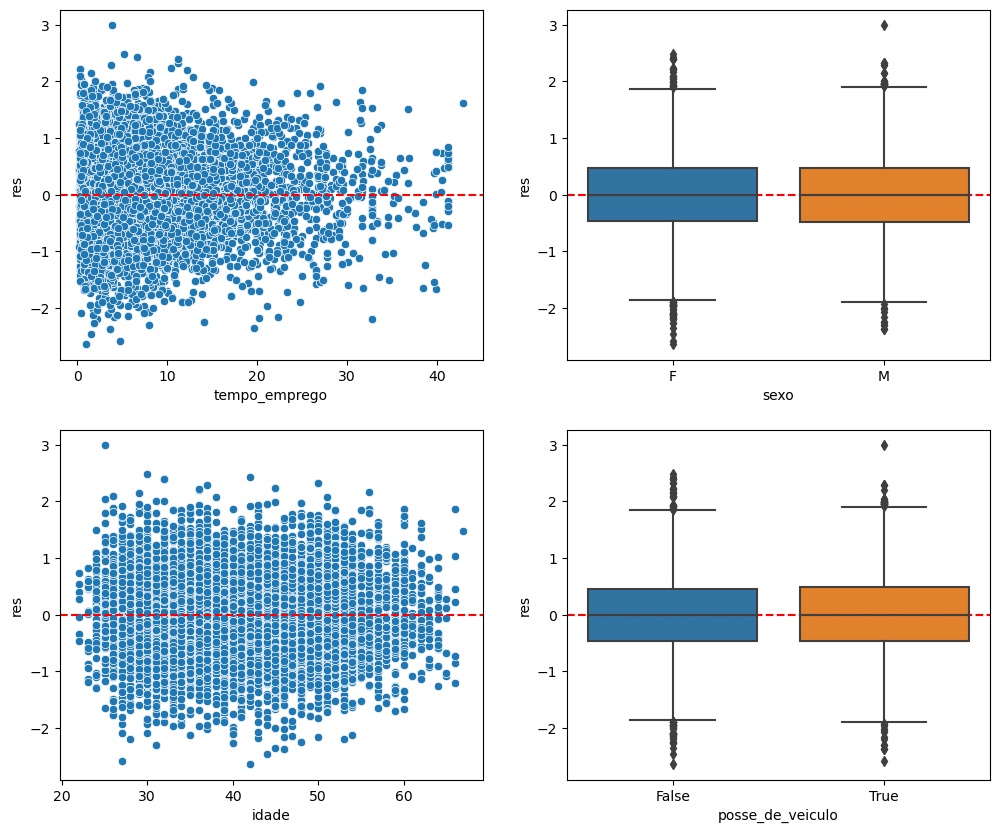

In [54]:
#Faça uma análise de resíduos. Avalie a qualidade do ajuste.

previsao['res'] = reg2.resid

fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(x='tempo_emprego', y='res', data=previsao, ax=axs[0,0])
axs[0,0].axhline(y=0, color='r', linestyle='--')

sns.boxplot(x='sexo', y='res', data=previsao, ax=axs[0,1])
axs[0,1].axhline(y=0, color='r', linestyle='--')

sns.scatterplot(x='idade', y='res', data=previsao, ax=axs[1,0])
axs[1,0].axhline(y=0, color='r', linestyle='--')

sns.boxplot(x='posse_de_veiculo', y='res', data=previsao, ax=axs[1,1])
axs[1,1].axhline(y=0, color='r', linestyle='--')
